In [ ]:
# Correlations

In [2]:
from matplotlib import pyplot
import pandas as pd
import numpy

In [66]:
df = pd.read_csv("../../data/final_ML_data.csv")
df = df.drop(columns=["Date", "acq_date", "count", "latitude", "longitude", "bright_t31", "Temp9am", "Temp3pm", "WindSpeed3pm", "WindSpeed9am", "WindDir3pm", "WindDir9am", "MinTemp", "MaxTemp", "Humidity", "Pressure", "Index", "WindGustDir", "Location"])
df = df.apply(pd.to_numeric, errors="coerce").fillna(0)

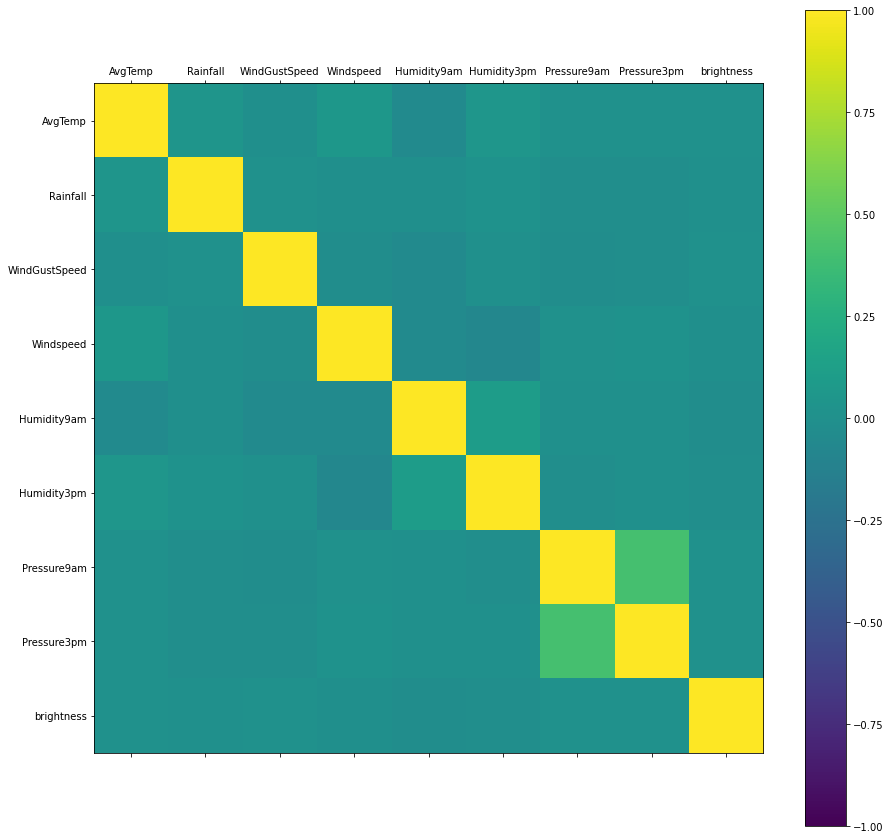

In [67]:
corr_df = df.drop(columns=["confidence"])
correlations = corr_df.corr()

fig = pyplot.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(corr_df.columns))
ax.set_yticklabels(list(corr_df.columns))
pyplot.show()

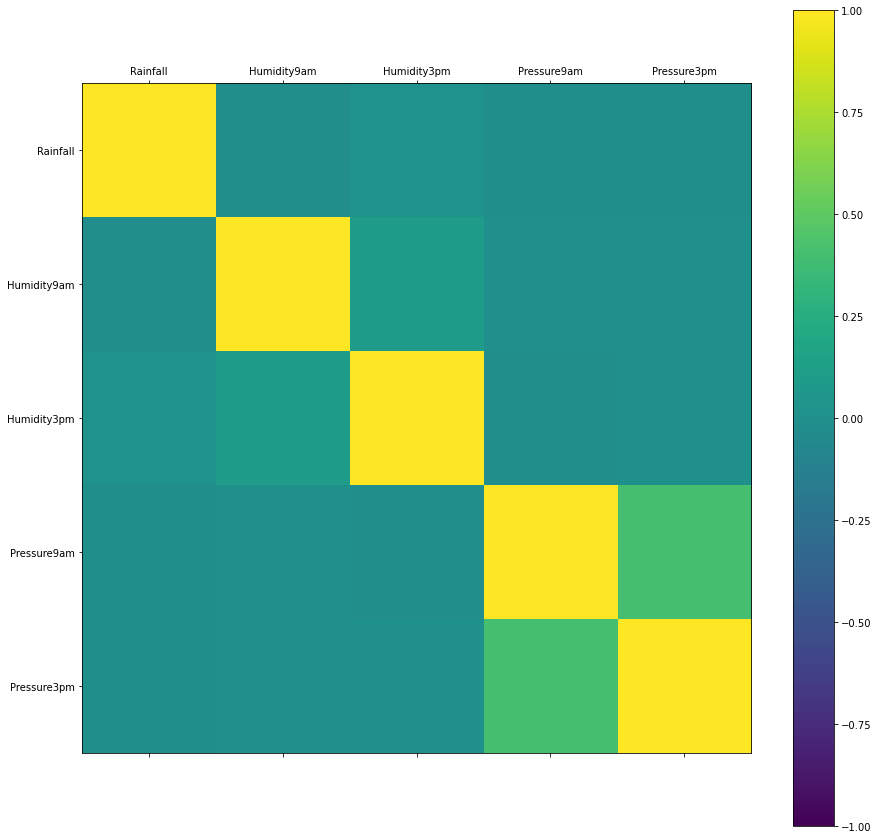

In [83]:
corr_df_shifted = df.drop(columns=["confidence", "brightness", "Windspeed", "WindGustSpeed", "AvgTemp"])
corr_df_shifted["Rainfall"] = corr_df_shifted["Rainfall"].shift(4).dropna()
correlations_shifted = corr_df_shifted.corr()

fig = pyplot.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations_shifted, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(corr_df_shifted.columns))
ax.set_yticklabels(list(corr_df_shifted.columns))
pyplot.show()